In [ ]:
import pandas
import numpy
import matplotlib.pyplot as mpl
import seaborn 

In [8]:
import warnings
warnings.filterwarnings("ignore")

seaborn.set(style="whitegrid") 

In [ ]:
data = pandas.read_csv("AIML_Dataset.csv")

In [ ]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [ ]:
data.columns

Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')

In [ ]:
data["isFraud"].value_counts()

isFraud
0    6354407
1       8213
Name: count, dtype: int64

In [ ]:
data["isFlaggedFraud"].value_counts()

isFlaggedFraud
0    6362604
1         16
Name: count, dtype: int64

In [ ]:
data.isnull().sum().sum()

np.int64(0)

In [ ]:
data.shape[0]

6362620

In [ ]:
 round((data["isFraud"].value_counts()[1] / data.shape[0]) * 100, 2)

np.float64(0.13)

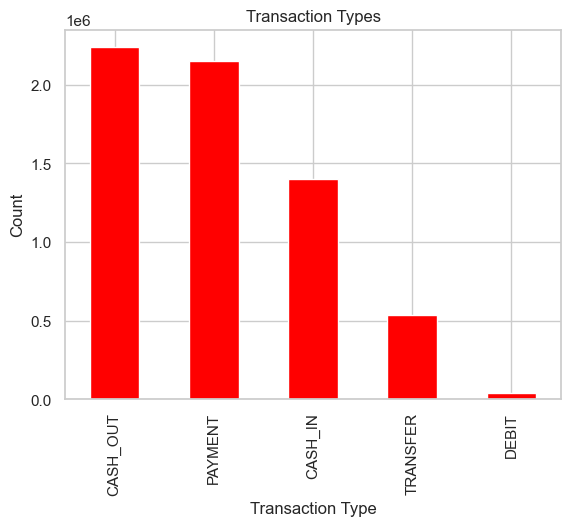

In [ ]:
data["type"].value_counts().plot(kind="bar", title="Transaction Types", color = "red")
# column.value_counts().plot(...) = graph that displays each column and count
mpl.xlabel("Transaction Type")
mpl.ylabel("Count")
mpl.show()


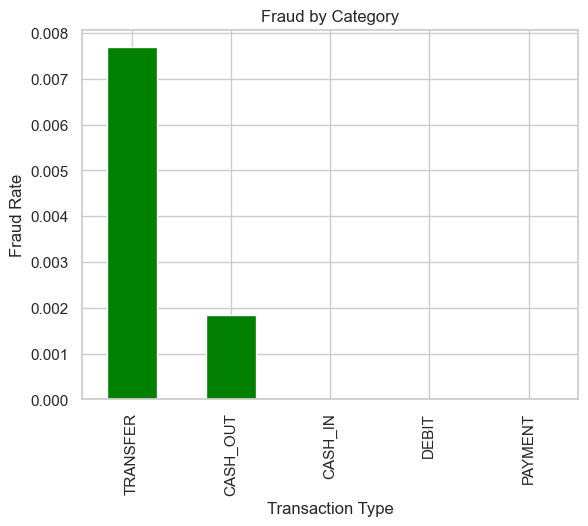

In [ ]:
fraud_rate = data.groupby("type")["isFraud"].mean().sort_values(ascending=False)
fraud_rate.plot(kind="bar", title="Fraud by Category", color="green")
mpl.ylabel("Fraud Rate")
mpl.xlabel("Transaction Type")
mpl.show()

In [42]:
fraud_rate

type
TRANSFER    0.007688
CASH_OUT    0.001840
CASH_IN     0.000000
DEBIT       0.000000
PAYMENT     0.000000
Name: isFraud, dtype: float64

In [ ]:
data["amount"].describe().astype(int)

count     6362620
mean       179861
std        603858
min             0
25%         13389
50%         74871
75%        208721
max      92445516
Name: amount, dtype: int64

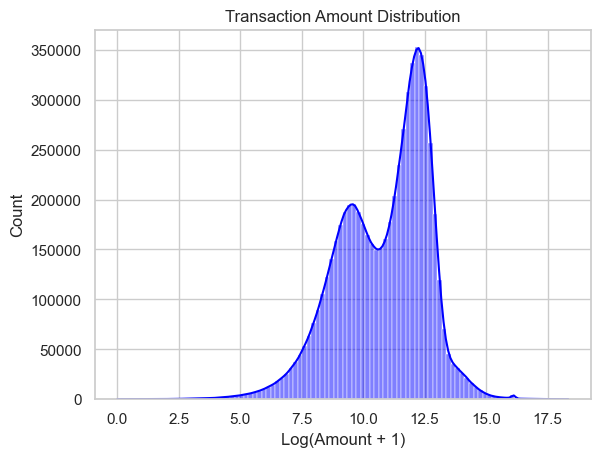

In [ ]:
seaborn.histplot(numpy.log1p(data["amount"]),bins = 100, kde = True, color = "blue")
mpl.title("Transaction Amount Distribution")
mpl.xlabel ("Log(Amount + 1)") 
mpl.show()

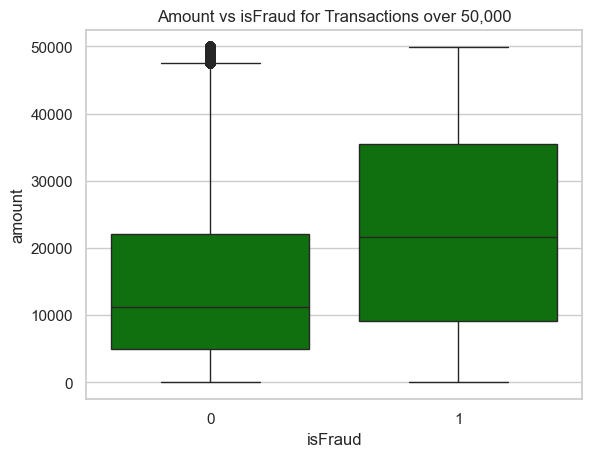

In [ ]:
seaborn.boxplot(data=data[data["amount"] < 50000], x = "isFraud", y = "amount", color="green")
mpl.title("Amount vs isFraud for Transactions over 50,000")
mpl.show()

In [ ]:
data["balanceDiffOrig"] = data["oldbalanceOrg"] - data["newbalanceOrig"]
data["balanceDiffDest"] = data["oldbalanceDest"] - data["newbalanceDest"]
int((data["balanceDiffOrig"] < 0).sum())

1399253

In [ ]:
int((data["balanceDiffDest"] < 0).sum())

2806464

In [ ]:
data.head(2)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0


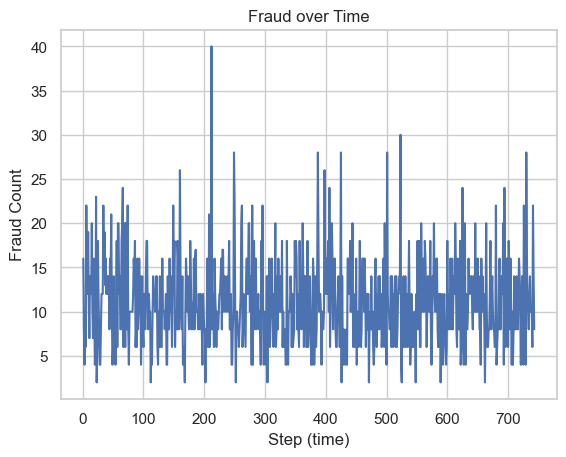

In [ ]:
fraud_per_step = data[data["isFraud"] == 1]["step"].value_counts().sort_index()
mpl.plot(fraud_per_step.index, fraud_per_step.values, label="Frauds per Step")
mpl.xlabel("Step (time)")
mpl.ylabel("Fraud Count")
mpl.title("Fraud over Time")
mpl.grid(True)
mpl.show()

In [97]:
data.drop(columns="step", inplace=True)

In [ ]:
data.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,balanceDiffOrig,balanceDiffDest
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,9839.64,0.0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,1864.28,0.0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,181.00,0.0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,181.00,21182.0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,11668.14,0.0


In [ ]:
top_senders = data["nameOrig"].value_counts().head(10)

In [74]:
top_senders

nameOrig
C1902386530    3
C363736674     3
C545315117     3
C724452879     3
C1784010646    3
C1677795071    3
C1462946854    3
C1999539787    3
C2098525306    3
C400299098     3
Name: count, dtype: int64

In [ ]:
top_receivers = data["nameDest"].value_counts().head(10)

In [76]:
top_receivers

nameDest
C1286084959    113
C985934102     109
C665576141     105
C2083562754    102
C248609774     101
C1590550415    101
C451111351      99
C1789550256     99
C1360767589     98
C1023714065     97
Name: count, dtype: int64

In [ ]:
fraud_users = data[data["isFraud"] == 1]["nameOrig"].value_counts().head(10)
fraud_users

nameOrig
C1305486145    1
C755286039     1
C973279667     1
C258213312     1
C1640703547    1
C1127265876    1
C317779855     1
C1064034527    1
C1141104763    1
C1966863341    1
Name: count, dtype: int64

In [81]:
fraud_types = data[data["type"].isin(["TRANSFER", "CASH_OUT"])]

In [85]:
fraud_types["type"].value_counts()

type
CASH_OUT    2237500
TRANSFER     532909
Name: count, dtype: int64

Text(0.5, 1.0, 'Fraud Distribution in Transfer / Cash Out')

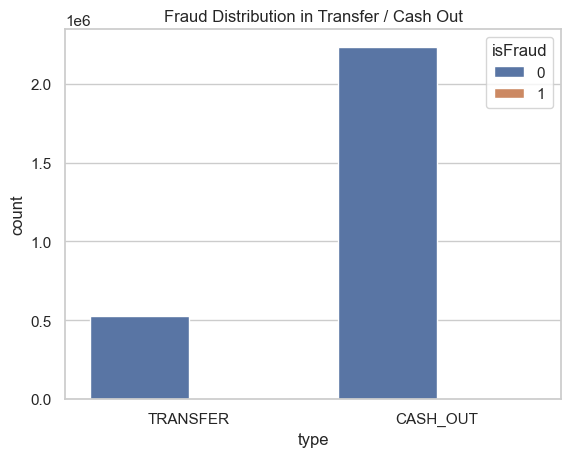

In [ ]:
seaborn.countplot(data=fraud_types,x="type", hue="isFraud")
mpl.title("Fraud Distribution in Transfer / Cash Out")


In [87]:
corr = data[["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest",  "isFraud"]].corr()

In [88]:
corr

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud
amount,1.000000,-0.002762,-0.007861,0.294137,0.459304,0.076688
oldbalanceOrg,-0.002762,1.000000,0.998803,0.066243,0.042029,0.010154
newbalanceOrig,-0.007861,0.998803,1.000000,0.067812,0.041837,-0.008148
oldbalanceDest,0.294137,0.066243,0.067812,1.000000,0.976569,-0.005885
newbalanceDest,0.459304,0.042029,0.041837,0.976569,1.000000,0.000535
isFraud,0.076688,0.010154,-0.008148,-0.005885,0.000535,1.000000


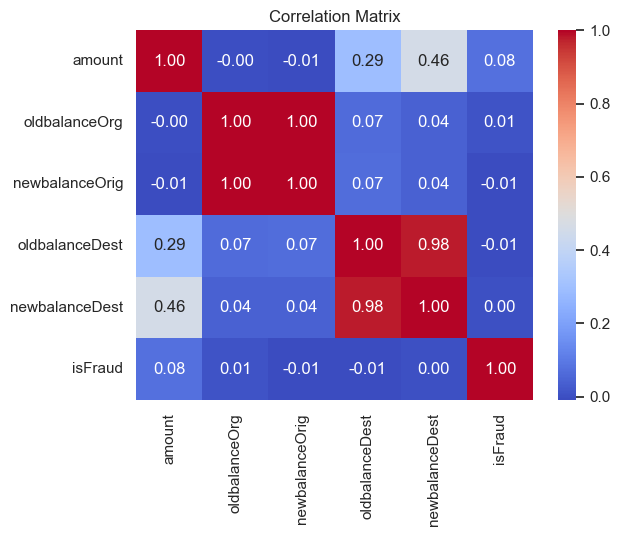

In [90]:
seaborn.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
mpl.title("Correlation Matrix")
mpl.show()

In [99]:
zero_after_transf = data[
    (data["oldbalanceOrg"] > 0) &
    (data["newbalanceOrig"] == 0) &
    (data["type"].isin(["TRANSFER", "CASH_OUT"]))
]

len(zero_after_transf)

1188074

In [100]:
zero_after_transf.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
2,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0
3,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0
15,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0
19,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0
24,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0


In [103]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [104]:
data.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [106]:
data_model = data.drop(["nameOrig", "nameDest", "isFlaggedFraud"], axis = 1)

In [107]:
data.head()

,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [108]:
categorical = ["type"]
numeric = ["amount", "oldbalanceOrg", "newbalanceOrig", "oldbalanceDest", "newbalanceDest"]


In [ ]:
y = data_model["isFraud"]